In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("SupplyChain.csv", encoding="unicode_escape")

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [9]:
# check null value
temp = df.isnull().sum()
temp[temp > 0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [10]:
# combine firstname and lastname
df["Customer Full Name"] = df["Customer Fname"] + df["Customer Lname"]

In [11]:
df["Customer Full Name"] 

0            CallyHolloway
1                IreneLuna
2         GillianMaldonado
3                 TanaTate
4            OrliHendricks
                ...       
180514       MariaPeterson
180515         RonaldClark
180516           JohnSmith
180517           MarySmith
180518        AndreaOrtega
Name: Customer Full Name, Length: 180519, dtype: object

In [13]:
# fill Customer  zipcode
df["Customer Zipcode"] = df["Customer Zipcode"].fillna(0)
df["Customer Zipcode"].isnull().sum()

0

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation between features
data = df
data.corr

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

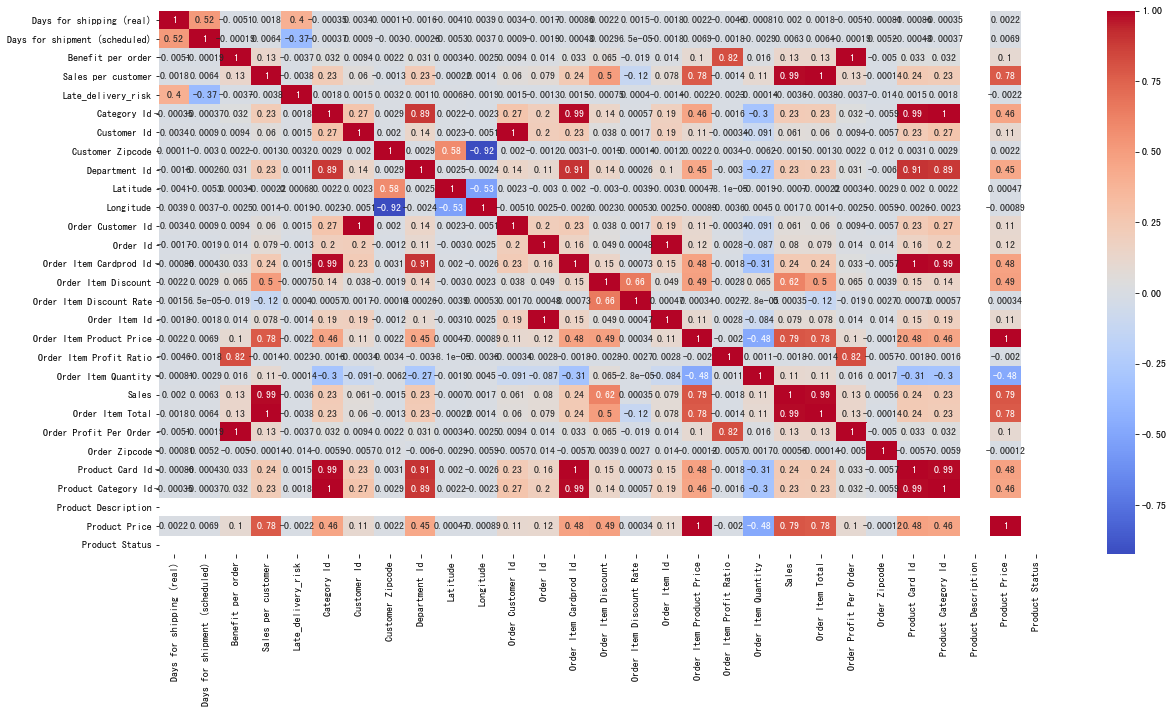

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

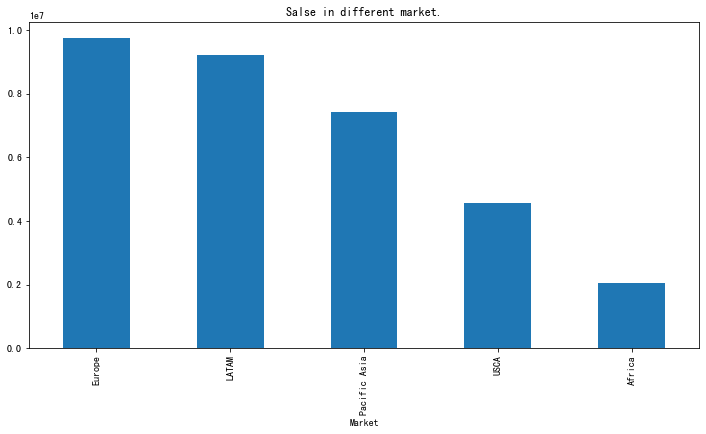

In [20]:
# do data exploration based on Market, Order Region
# Based on market
market = data.groupby("Market")
market["Sales per customer"].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title="Salse in different market.")

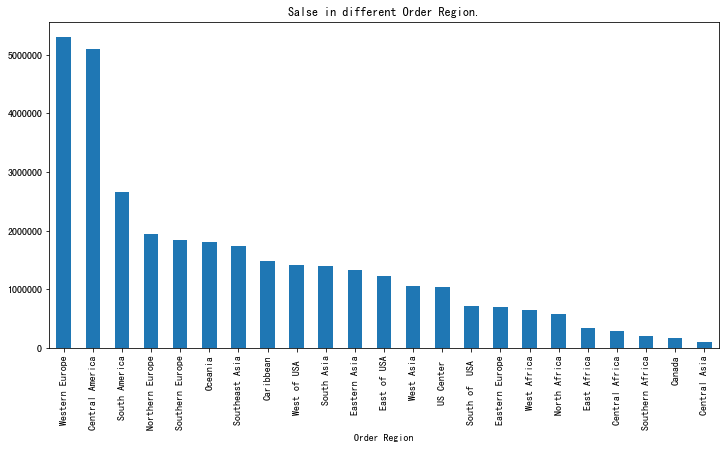

In [22]:
# Based on order region
market = data.groupby("Order Region")
market["Sales per customer"].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title="Salse in different Order Region.")

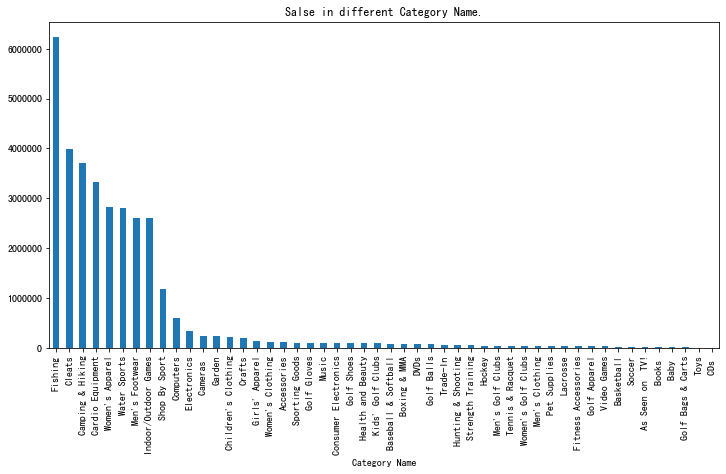

In [23]:
# Based on Category name
market = data.groupby("Category Name")
market["Sales per customer"].sum().sort_values(ascending=False).plot.bar(figsize=(12, 6), title="Salse in different Category Name.")

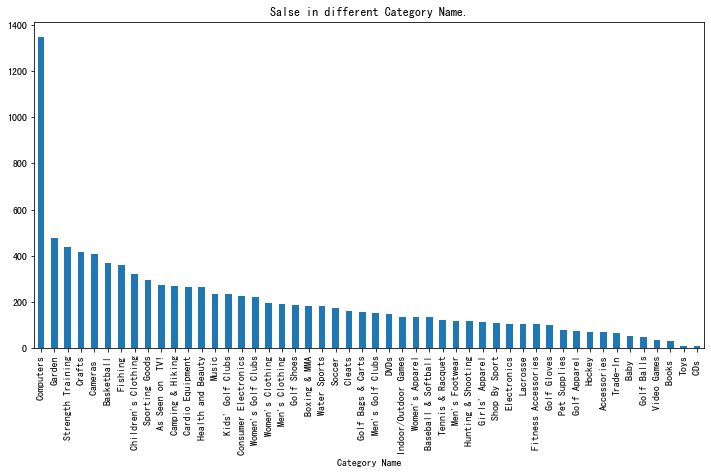

In [24]:
# Based on Category name
market = data.groupby("Category Name")
market["Sales per customer"].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6), title="Salse in different Category Name.")

In [26]:
# based on time dimention
# create timestamp index
tmp = pd.DatetimeIndex(data["order date (DateOrders)"])

In [28]:
data["order_year"] = tmp.year
data["order_month"] = tmp.month
data["order_week_day"] = tmp.weekday
data["order_hour"] = tmp.hour
data["order_month_year"] = tmp.to_period('M')

data[["order_year", "order_month", "order_week_day", "order_hour", "order_month_year"]]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


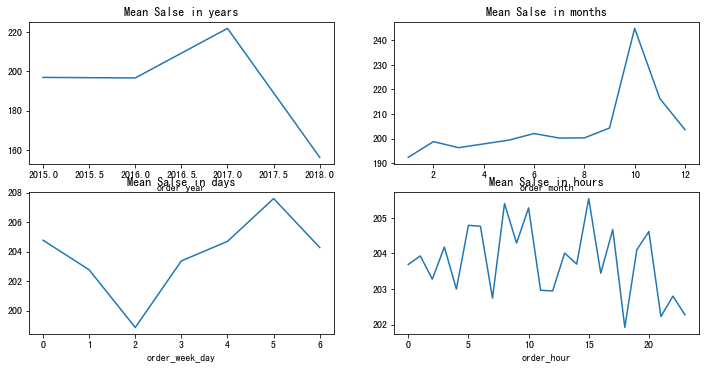

In [40]:
plt.figure(figsize=(10, 12))
plt.subplot(4, 2, 1)
df_year = data.groupby("order_year")
df_year["Sales"].mean().plot(figsize=(12, 12), title="Mean Salse in years")

plt.subplot(4, 2, 2)
df_day = data.groupby("order_month")
df_day["Sales"].mean().plot(figsize=(12, 12), title="Mean Salse in months")

plt.subplot(4, 2, 3)
df_day = data.groupby("order_week_day")
df_day["Sales"].mean().plot(figsize=(12, 12), title="Mean Salse in days")

plt.subplot(4, 2, 4)
df_day = data.groupby("order_hour")
df_day["Sales"].mean().plot(figsize=(12, 12), title="Mean Salse in hours")



Text(0, 0.5, 'Sales per customer')

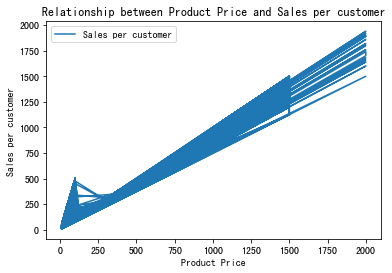

In [42]:
# Relationship between Product Price and Sales per customer
data.plot(x="Product Price", y = "Sales per customer")
plt.title("Relationship between Product Price and Sales per customer")
plt.xlabel("Product Price")
plt.ylabel("Sales per customer")

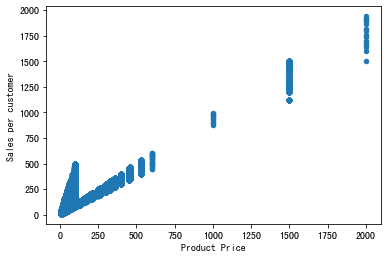

In [45]:
data.plot(x="Product Price", y = "Sales per customer", kind="scatter")